In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random
df = load("../../preprocessing/clustering_data.joblib")
df.head()

,pca_0,pca_1
0,0.753289,0.401192
1,0.688804,0.493711
2,0.681094,0.466273
3,0.474369,0.449348
4,0.663911,0.517927


In [2]:
df.shape

(1500, 2)

In [3]:
df.describe()

,pca_0,pca_1
count,1500.000000,1500.000000
mean,0.392984,0.438740
std,0.193394,0.201703
min,0.000000,0.000000
25%,0.250750,0.284351
50%,0.368573,0.425142
75%,0.509459,0.593557
max,1.000000,1.000000


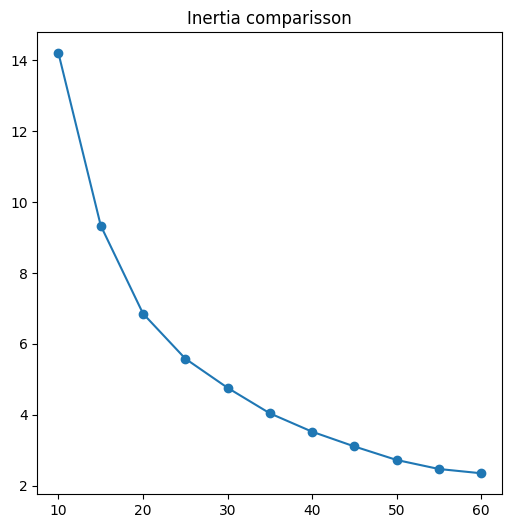

In [16]:
inits = ['k-means++', 'random']
clusters = range(10,61,5)
inertias = []
silhouettes = []
for cluster in clusters:
  for init in inits:
    kmeans = KMeans(n_clusters=cluster, init=init, n_init='auto')
    kmeans.fit(df)

    if init == 'k-means++':
      inertias.append(kmeans.inertia_)
      silhouettes.append(silhouette_score(df, kmeans.labels_))

plt.figure(figsize=(6,6))
plt.plot(clusters, inertias, marker='o')
plt.title('Inertia comparisson')
plt.show()

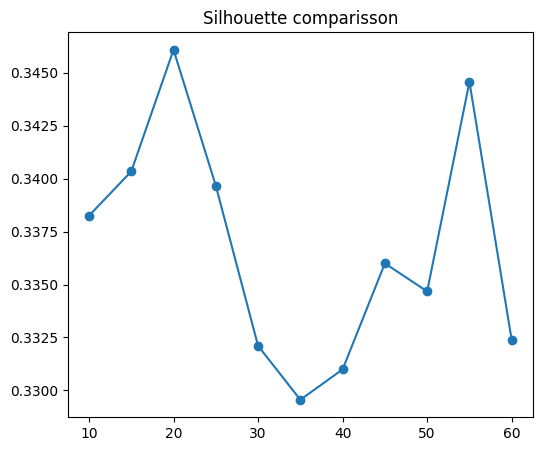

In [17]:
plt.figure(figsize=(6,5))
plt.plot(clusters, silhouettes, marker='o')
plt.title('Silhouette comparisson')
plt.show()

In [18]:
num_clusters = 55
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init='auto')
kmeans.fit(df)

KMeans(n_clusters=55, n_init='auto')

In [19]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids

,0,1
0,0.374246,0.409079
1,0.609109,0.434730
2,0.273304,0.318679
3,0.319542,0.747534
4,0.880136,0.508368
5,0.451437,0.222180
6,0.533949,0.761298
7,0.159556,0.497348
8,0.257417,0.171094
9,0.758210,0.596552


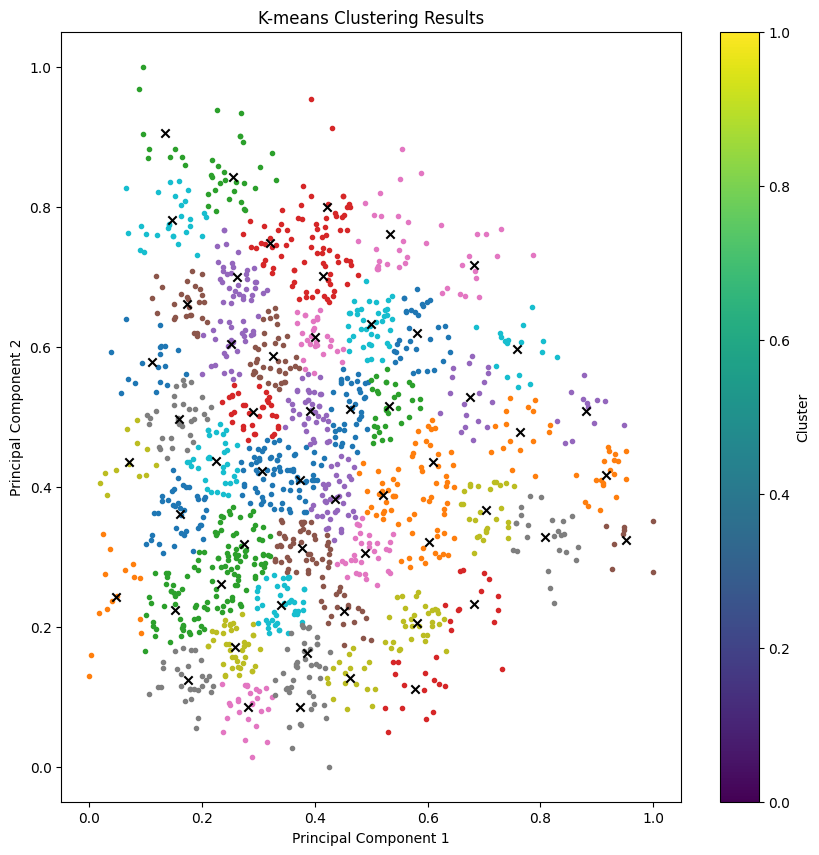

In [20]:
plt.figure(figsize=(10,10))
for cluster_label in range(num_clusters):
    cluster = df[kmeans.labels_ == cluster_label]
    plt.scatter(cluster['pca_0'], cluster['pca_1'], marker='.')

plt.scatter(centroids[0], centroids[1], marker='x', color='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()